In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("Sale_Conversion_Project_Cleaned.csv")

## Segmentation by groups

In [2]:
print(df["Age_bins"].value_counts())

Age_bins
Middle Aged    1712
Senior          269
Young           259
Name: count, dtype: int64


In [3]:
print(df["Education"].value_counts())

Education
Bachelors        1330
Masters           856
Undergraduate      54
Name: count, dtype: int64


In [4]:
print(df["Marital_Status"].value_counts())

Marital_Status
In Couple    1444
Single        796
Name: count, dtype: int64


In [5]:
print(df["Income_groups"].value_counts())

Income_groups
Average Income    1029
High Income        841
Low Income         370
Name: count, dtype: int64


## Visualization of total spending

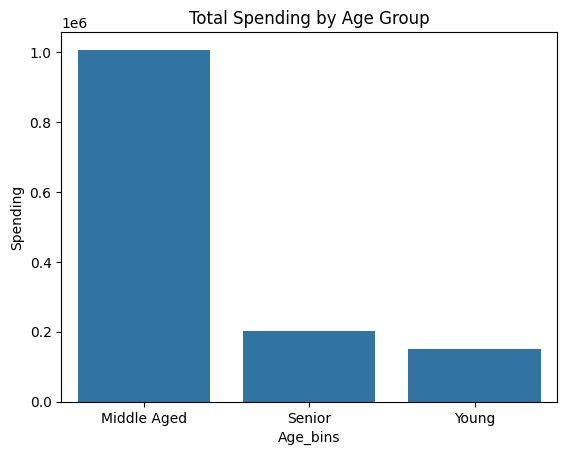

In [6]:
grouped = df.groupby('Age_bins')['Spending'].sum().reset_index()
sns.barplot(x='Age_bins', y='Spending', data=grouped)
plt.title('Total Spending by Age Group')
plt.show()

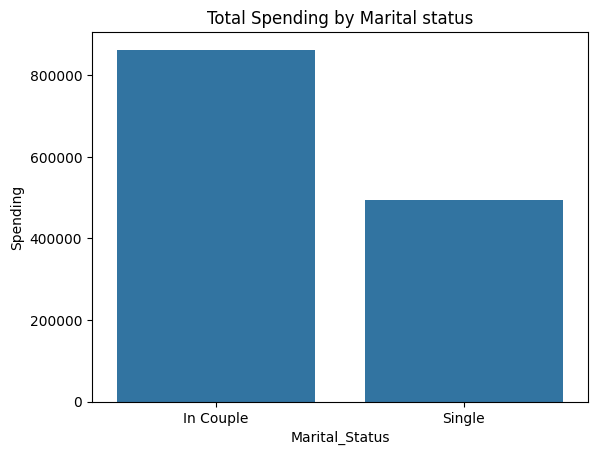

In [7]:
grouped = df.groupby('Marital_Status')['Spending'].sum().reset_index()
sns.barplot(x='Marital_Status', y='Spending', data=grouped)
plt.title('Total Spending by Marital status')
plt.show()

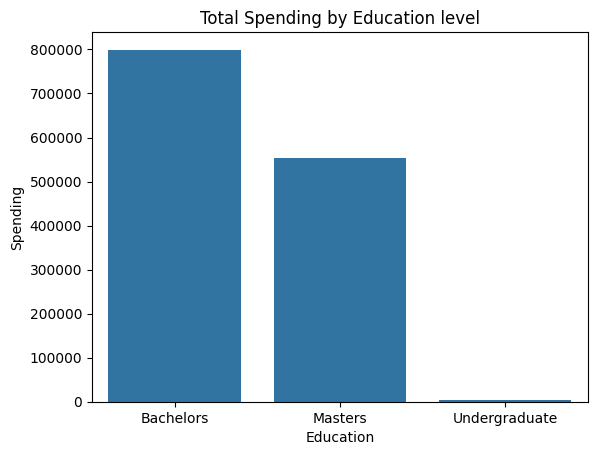

In [8]:
grouped = df.groupby('Education')['Spending'].sum().reset_index()
sns.barplot(x='Education', y='Spending', data=grouped)
plt.title('Total Spending by Education level')
plt.show()

## Visualization of campaign-related parameters

In [13]:
df['Total_Campaign_Response'] = (
    df['Accepted_1st_Campaign'] + df['Accepted_2nd_Campaign'] +
    df['Accepted_3rd_Campaign'] + df['Accepted_4th_Campaign'] +
    df['Accepted_5th_Campaign'] + df['Last_Campaign_Response']
)
df['Converted'] = (df['Total_Campaign_Response'] > 0).astype(int)

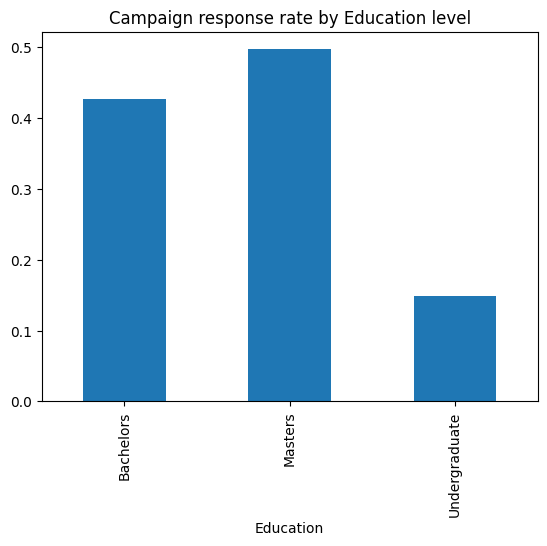

In [14]:
df.groupby('Education')['Total_Campaign_Response'].mean().plot(kind='bar', title='Campaign response rate by Education level')
plt.show()

Campaign response is the highest in customers with Master's even though they are significantly lower than those with Bachelors

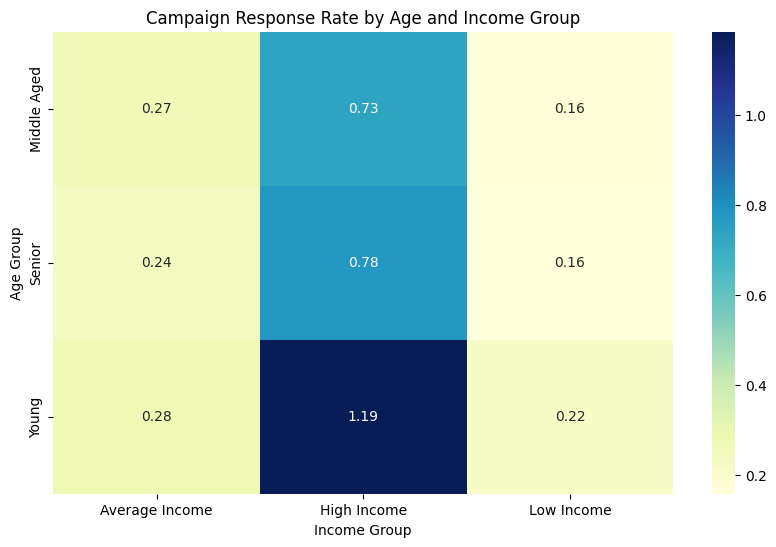

In [15]:
heatmap_data = df.pivot_table(
    index='Age_bins',
    columns='Income_groups',
    values='Total_Campaign_Response',
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Campaign Response Rate by Age and Income Group')
plt.ylabel('Age Group')
plt.xlabel('Income Group')
plt.show()

Even though middle aged are higher in proportion than young ones,they have a low response rate

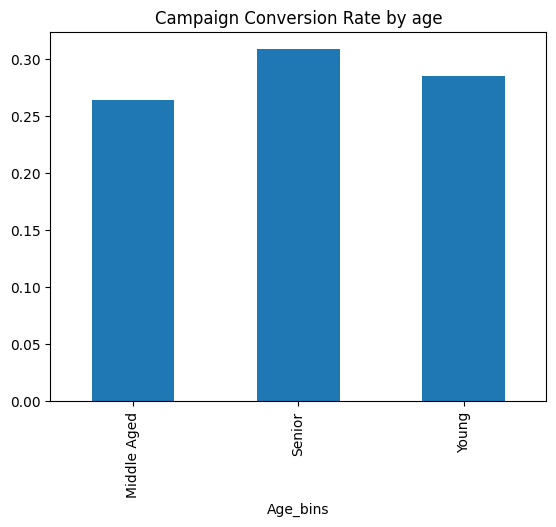

In [20]:
df.groupby('Age_bins')['Converted'].mean().plot(kind='bar', title='Campaign Conversion Rate by age')
plt.show()

The campaign has high conversion rates among all ages.But we can infer that middle ages customers might not have accepted all campaigns

## Correlation

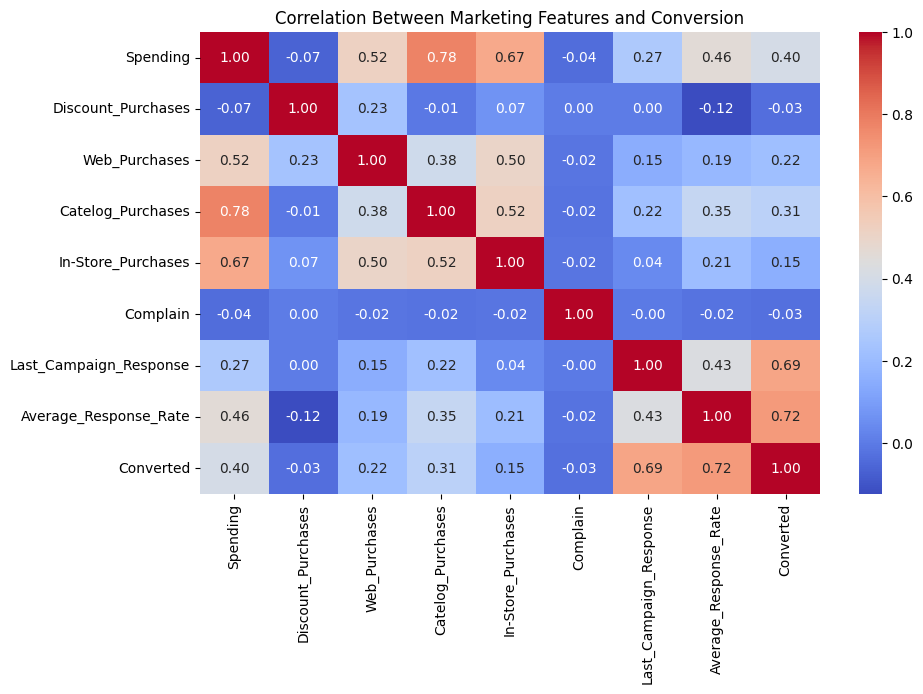

In [17]:
cols = [
    'Spending', 'Discount_Purchases', 'Web_Purchases',
    'Catelog_Purchases', 'In-Store_Purchases', 'Complain',
    'Last_Campaign_Response', 'Average_Response_Rate', 'Converted'
]

correlation_df = df[cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Marketing Features and Conversion')
plt.show()


Campaign success depends highly on the last campaign as seen above

## Line plot of campaign performance

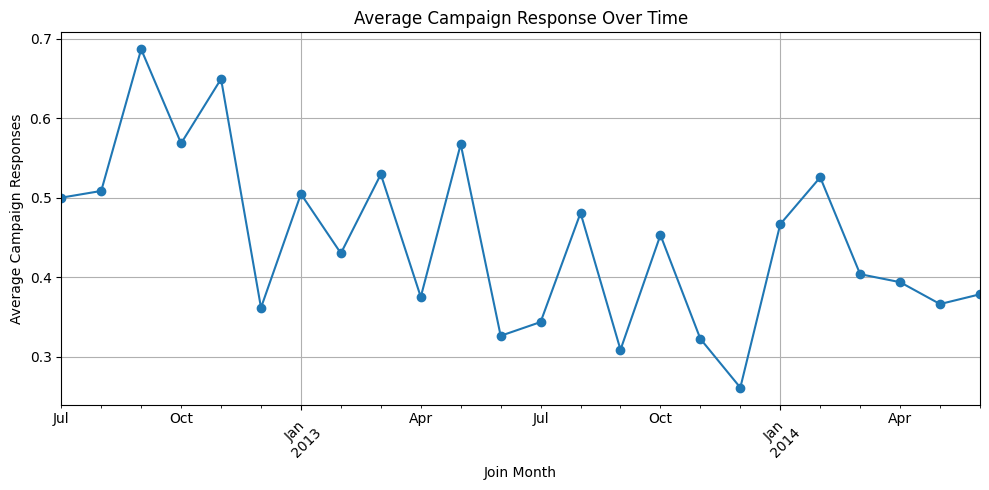

In [18]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Join_Month'] = df['Dt_Customer'].dt.to_period('M')
monthly_response = df.groupby('Join_Month')['Total_Campaign_Response'].mean()
monthly_response.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Average Campaign Response Over Time')
plt.xlabel('Join Month')
plt.ylabel('Average Campaign Responses')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The campaign had a high decline even if the start was promising

## Customer Engagement Breakdown

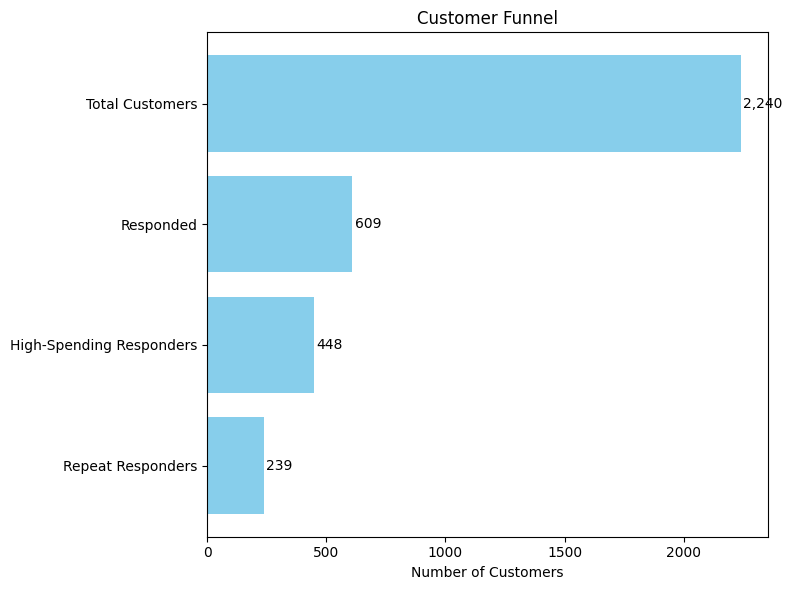

In [19]:

total_customers = len(df)
responded = df['Converted'].sum()
high_spenders = df[df['Converted'] & (df['Spending'] > df['Spending'].median())].shape[0]
repeat_responders = df[df['Total_Campaign_Response'] >= 2].shape[0]

stages = ['Total Customers', 'Responded', 'High-Spending Responders', 'Repeat Responders']
values = [total_customers, responded, high_spenders, repeat_responders]


fig, ax = plt.subplots(figsize=(8, 6))
ax.invert_yaxis()
bars = ax.barh(stages, values, color='skyblue')

for bar in bars:
    ax.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():,}', va='center')

plt.title('Customer Funnel')
plt.xlabel('Number of Customers')
plt.tight_layout()
plt.show()


Responded customers are just 27%(approximately) of the total number of customers

## Overall Insights

The proportion of Young customers is very less .So there should be more initiatives to increase their number
Lower Campaign response rate among Bachelor education level customers must be analysed so as to know the reason
Campaign is successful in only few stages.Measures must be taken to ensure consistency
Campaign might like effective but customer engagement is low overall